In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
from keras.datasets import mnist
from keras.utils import to_categorical


In [2]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# Flatten the images into a 784-dimensional vector
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))
# Convert the labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


11490434/11490434 [==============================] - 0s 0us/step


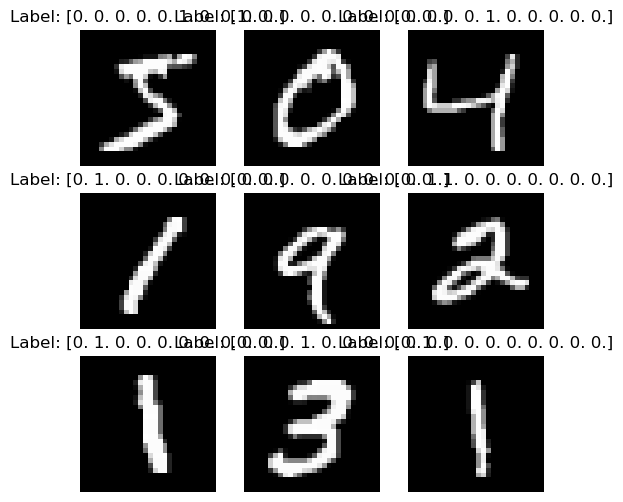

In [7]:
import matplotlib.pyplot as plt
# Reshape the flattened images into 2D arrays
x_train_2d = x_train.reshape((x_train.shape[0], 28, 28))
x_test_2d = x_test.reshape((x_test.shape[0], 28, 28))

# Plot some example images from the training set
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train_2d[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
    
plt.show()


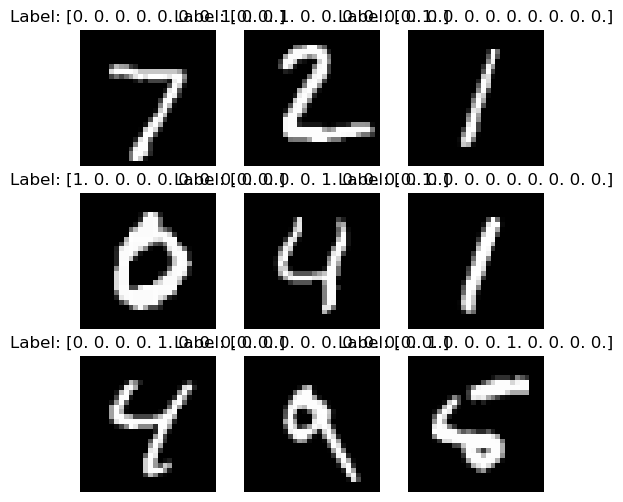

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test_2d[i], cmap='gray')
    ax.set_title(f"Label: {y_test[i]}")
    ax.axis('off')
plt.show()


In [9]:
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
 
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Define the model architecture
model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compile the model with a categorical cross-entropy loss function and RMSprop optimizer
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
# Train the model for 10 epochs
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))


(60000, 10)
(10000, 784)
(10000, 10)
Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3248 - accuracy: 0.9032 - val_loss: 0.1344 - val_accuracy: 0.9589
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1410 - accuracy: 0.9578 - val_loss: 0.0955 - val_accuracy: 0.9712
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1019 - accuracy: 0.9686 - val_loss: 0.0875 - val_accuracy: 0.9729
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0836 - accuracy: 0.9748 - val_loss: 0.0731 - val_accuracy: 0.9780
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0705 - accuracy: 0.9789 - val_loss: 0.0681 - val_accuracy: 0.9788
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0596 - accuracy: 0.9817 - val_loss: 0.0655 - val_accuracy: 0.9808
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0532 - accuracy: 0.9836 - val_loss:

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0531 - accuracy: 0.9841 - val_loss: 0.0881 - val_accuracy: 0.9790
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0568 - accuracy: 0.9837 - val_loss: 0.0931 - val_accuracy: 0.9781
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0534 - accuracy: 0.9859 - val_loss: 0.0849 - val_accuracy: 0.9824
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0503 - accuracy: 0.9866 - val_loss: 0.0922 - val_accuracy: 0.9815
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0500 - accuracy: 0.9863 - val_loss: 0.0822 - val_accuracy: 0.9830
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0482 - accuracy: 0.9869 - val_loss: 0.1055 - val_accuracy: 0.9806
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0485 - accuracy: 0.9872 - val_loss: 0.1028 - val_accuracy:

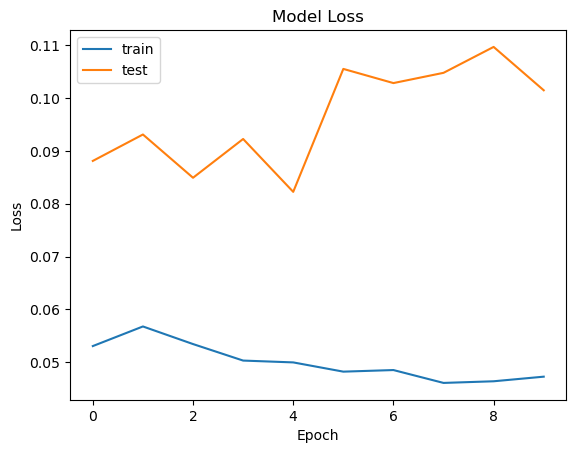

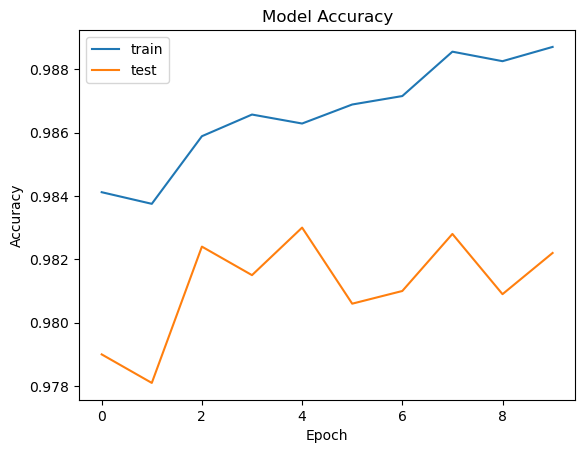

In [11]:
import matplotlib.pyplot as plt

# Train the model and get the history object
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
